In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/Users/RWL11/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


1.10.1


In [3]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [4]:
print("Training set: {}".format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

Training set: (404, 13)
Testing set: (102, 13)


In [5]:
print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [6]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head

<bound method NDFrame.head of          CRIM     ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.07875   45.0   3.44   0.0  0.437  6.782   41.1  3.7886   5.0  398.0   
1     4.55587    0.0  18.10   0.0  0.718  3.561   87.9  1.6132  24.0  666.0   
2     0.09604   40.0   6.41   0.0  0.447  6.854   42.8  4.2673   4.0  254.0   
3     0.01870   85.0   4.15   0.0  0.429  6.516   27.7  8.5353   4.0  351.0   
4     0.52693    0.0   6.20   0.0  0.504  8.725   83.0  2.8944   8.0  307.0   
5     2.37857    0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
6     0.13642    0.0  10.59   0.0  0.489  5.891   22.3  3.9454   4.0  277.0   
7     0.06888    0.0   2.46   0.0  0.488  6.144   62.2  2.5979   3.0  193.0   
8     0.17331    0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
9     0.13262    0.0   8.56   0.0  0.520  5.851   96.7  2.1069   5.0  384.0   
10   19.60910    0.0  18.10   0.0  0.671  7.313   97.9  1.3163  24.0  666.0   
11    0.75026    0.0  

In [7]:
print(train_labels[0:10])

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [8]:
# Test data is *not* used when calculating mean and stdev for normalization

mean = train_data.mean(axis=0)
stdev = train_data.std(axis=0)
train_data = (train_data - mean) / stdev
test_data = (test_data - mean) / stdev

print(train_data[0])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [9]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                          input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [10]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
EPOCHS = 500

history = model.fit(train_data, train_labels, epochs = EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

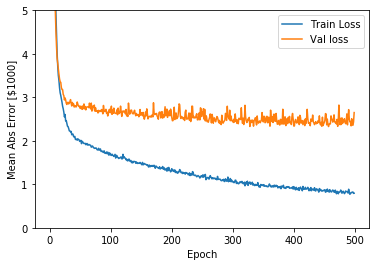

In [11]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [$1000]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
            label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
            label='Val loss')
    plt.legend()
    plt.ylim([0, 5])
    
plot_history(history)

In [12]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print('Testing set MAE: ${:7.2f}'.format(mae * 1000))

Testing set MAE: $2404.83


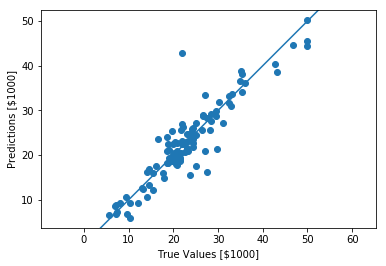

In [13]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [$1000]')
plt.ylabel('Predictions [$1000]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100,100])

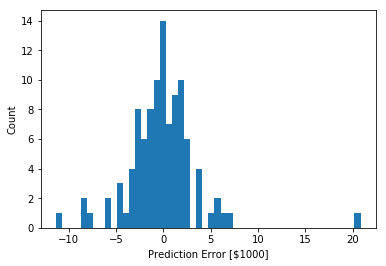

In [14]:
error = test_predictions - test_labels
plt.hist(error, bins=50)
plt.xlabel("Prediction Error [$1000]")
_ = plt.ylabel("Count")